By now (after 9_A) ``WE KNOW - What is time series?``  
--

> Time series is a collection of data points that are collected at constant time intervals.

> It is time dependent.

> Most of time series have some form of ``seasonality trends``. For example, if we sale ice cream, most probably there will be higher sales in summer seasons. Therefore, this time series has seasonality trends.

> Another example, lets think we dice one time every day during 1 year. As you guess, there will be no scenario like that number six is appeared mostly in summer season or number five is mostly appeared in January. Therefore, this time series does not have seasonality trends.

More Concepts with Practical Applications
--

**``Stationarity of a Time Series``**

There are three basic criterion for a time series to understand whether it is stationary series or not.

Statistical properties of time series such as mean, variance should remain constant over time to call time series is stationary
1. constant mean
2. constant variance
3. constant autocovariance. `Note` : Autocovariance does not depend on time. autocovariance is covariance between time series and lagged time series.


***What is variance and covariance ?***

``Must read`` : https://www.surveygizmo.com/resources/blog/variance-covariance-correlation/

In [1]:
# Lets visualize and check seasonality trend of our time series.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

import warnings
warnings.filterwarnings('ignore')

In [3]:
# we are loading dataset : weather conditions in world war 2
# Summary_of_Weather.csv
# It includes measured min, max and mean temperatures from weather stations.

# This is very large dataset. You may get "Low memory" warning

weather_df = pd.read_csv("C:\Program Files/Python36/suven/Data Anaylsis/Dataset/Summary_of_Weather.csv")
weather_df.shape


(119040, 31)

In [4]:
# see few rows of the dataset
weather_df.head(1)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# data cleaning : get only those columns from weather_df, which we intend to use. 
# what we will use only
weather = weather_df.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


**``Information Given``** : Lets accept this and move on :

1. In this World War dataset,  Lets focus USA and BURMA war

2. In this war USA bomb BURMA( KATHA city) from 1942 to 1945.

3. The closest weather station to this war is ``BINDUKURI`` and it has temperature record from 1943 to 1945.

4. Now lets visualize this situation. But before visualization, we need to make date features ->  **date time object**.

5. ``BINDUKURI`` weather station Id i.e weather.STA is ``32907``

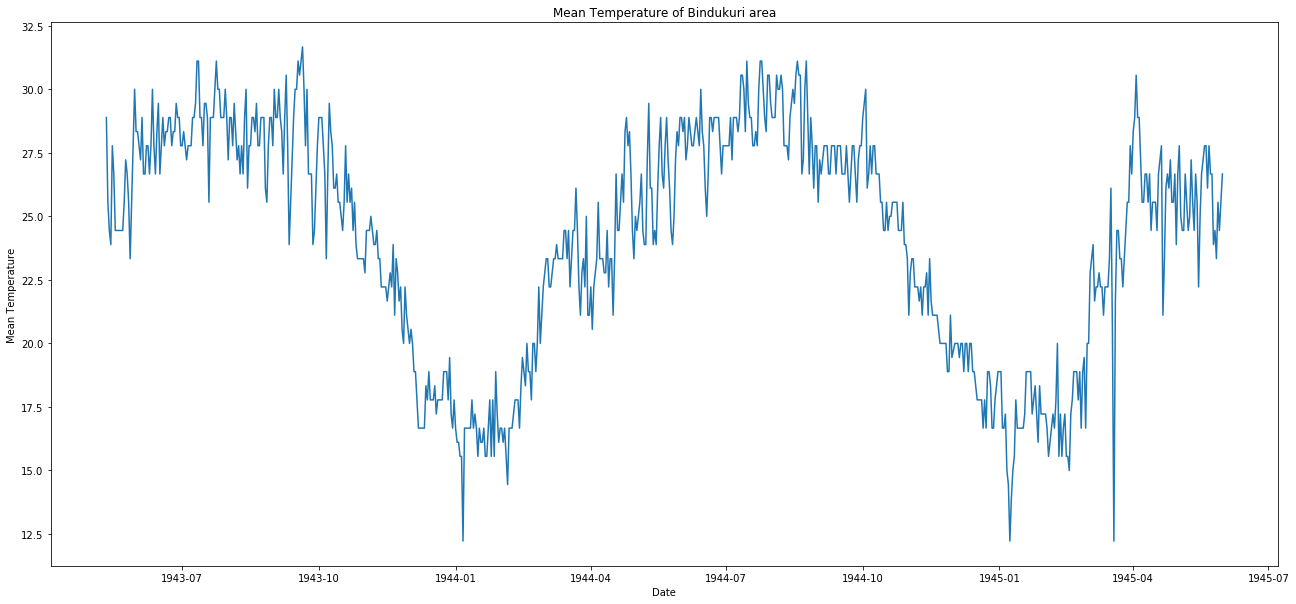

In [7]:
weather_bin = weather.loc[weather.STA == 32907]

weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
# print(weather_bin.info())
#code for plotting
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show();



As you can see from plot above, our time series has ``seasonal variation``. In summer, mean temperature is higher and in winter mean temperature is lower for each year.

Now ``lets check stationarity of time series``. We can check **stationarity** using the following methods:

1. **``Plotting Rolling Statistics``**: We have a window, lets say window size is 6 and then we find rolling mean and variance to check stationarity.

2. **``Augumented Dickey-Fuller Test``**: The test results comprise of a Test Statistic(like T-test or Z-Test) and some Critical Values for different confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.

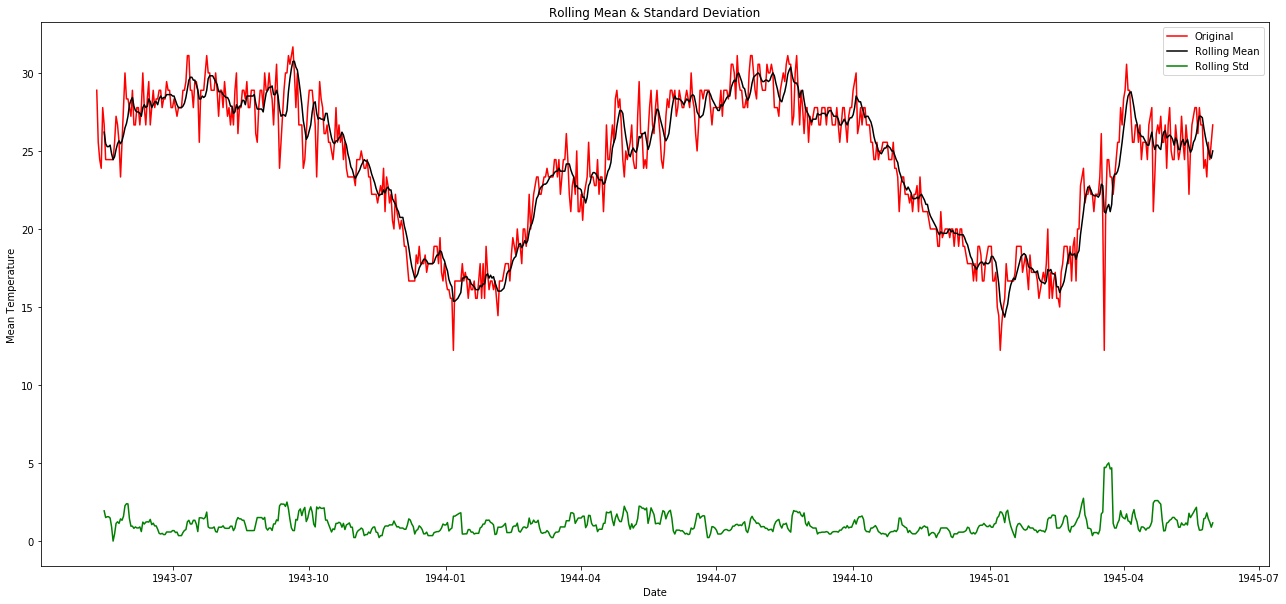

Test statistic:  -1.409596674588777
p-value:  0.577666802852635
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [9]:
# adfuller library  -> Augmented Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller

# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts) # Augmented Dicky Fuller Test
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    # result[2] -> usedlag , the number of lags used
    # result[3] -> nobs, The number of observations used for the regression and calculation of the critical values.
    print('Critical Values:' ,result[4])
    
 # check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()  # 6 is the window size
    rolstd = ts.rolling(6).std()
    
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
    
# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


# check stationary: mean, variance(std) and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)    

**``Observation``**

1. Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (not stationary)

2. Second one is constant variance. It looks like constant, as we see very low changes in variance. (yes stationary)

3. Third one is that If the test statistic is less than the critical value, we can say that time series is stationary. Lets look:
test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than the critical values. (not stationary)

**``Remember``** : Test for stationarity: If the test statistic is less than the critical value, we fail to reject the null hypothesis (aka the series is not stationary). When the test statistic is greater than the critical value, we reject the null hypothesis (which means the series is stationary). 

**As a result, we are sure that our time series is not stationary.**

We saw practically about **``stationarity``**. Now, some theory about it.

Stationarity
--

<img src="img/about_stationary.jpg">

**When a time series is ``stationary``, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary.**

**Making the time series stationary is critical if we want the forecasting model to work well.** 

*Because most of the data you collect will have non-stationary trends. And if the spikes are erratic how can you be sure the model will work properly?*

There are multiple tests that can be used to check stationarity.

1. ADF( Augmented Dicky Fuller Test)  --> we have already seen it above.
2. KPSS ( https://en.wikipedia.org/wiki/KPSS_test )
3. PP (Phillips-Perron test)

Making a Time Series Stationary
--

Now that we are familiar with the concept of stationarity and its different types, we can finally move on to actually making our series stationary. Always keep in mind **that in order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first**.

In [10]:
# we are working with a AirPassengers.csv Toy-data-Set.
# for experimenting in this topic : "Making Time series Stationary"

#loading important libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading the dataset
train = pd.read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/AirPassengers.csv')

#preprocessing
train.timestamp = pd.to_datetime(train.Month)
train.index = train.timestamp
train.drop('Month',axis = 1, inplace = True)

#looking at the first few rows
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


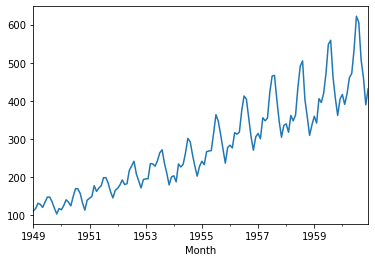

In [11]:
# plotting the toy-data-set
train['#Passengers'].plot();



**``Visual Observation``** : This series is not stationary. 

**``3 Methods to make time series Stationary`` :**

1. ``Differencing``
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

<img src='img/differencing_timeSeries.jpg'>

where yt is the value at a time t

Applying differencing on our series and plotting the results:

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
Name: #Passengers, dtype: float64
Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: #Passengers_diff, dtype: float64


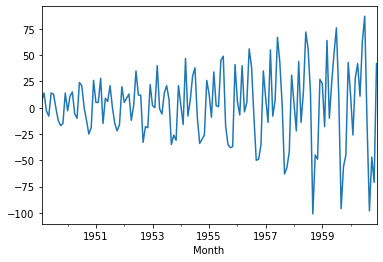

In [13]:
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)

# print(train['#Passengers'].head())
# print(train['#Passengers'].shift(1).head())
# print(train['#Passengers_diff'].head())

train['#Passengers_diff'].dropna().plot();


2. **``Seasonal Differencing``**

In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. 

Mathematically it can be written as:

<img src="img/SeasonalDifferencing_TimeSeries.jpg">

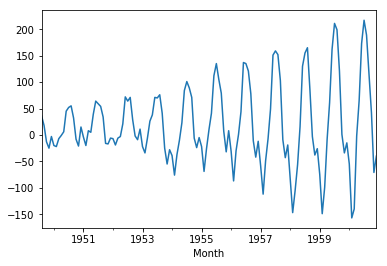

In [13]:
n=7
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(n)
train['#Passengers_diff'].dropna().plot();

3. **``Transformation``**
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform.

*transformation is something very similar to Normalizing data*

Let’s do a quick log transform and differencing on our air passenger dataset:

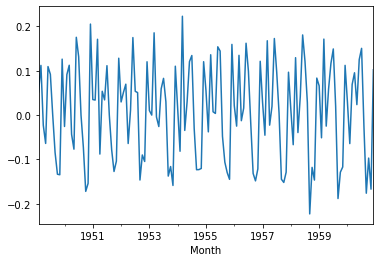

In [14]:
train['#Passengers_log'] = np.log(train['#Passengers'])
train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)
train['#Passengers_log_diff'].dropna().plot();

``Observation`` : As you can see, this plot is a significant improvement over the previous plots.